# Quantifying the World: Case Study 4
Eric Romero, Patricia Attah, Antonio Debouse

### Table of Contents:

   * <a href="#1"> Business Understanding </a>
   * <a href="#2"> Data Evaluation/Engineering </a>
   * <a href="#3"> Modeling Preparations </a>
   * <a href="#4"> Model Building and Evaluation </a>
   * <a href="#5"> Model Interpretability and Explainability </a>
   * <a href="#6"> Case Conclusions </a>

<a id="1"></a>
## Business Understanding
We, the data scientists, were assigned the objective by the Finance Department to create the best model with the capability to predict if a company will file for bankruptcy in the future. Holding an investment position in a company that files for bankruptcy can lead to major monetary losses, and the Finance Department would like to avoid this negative scenario by selling investment positions if a company will likely to file for bankruptcy. The Finance Department specifically stated they do not care about predicting the year a company will go bankrupt, just if the company will file or not; we will not be using time as a variable.  

### Task Summary:
* Use Random Forest and XGBoost to accurately predict bankruptcy. Tune your models for maximum accuracy, but include precision and recall as summary metrics.

 

<a id="2"></a>
## Data Evaluation / Engineering
* We were given 5 datasets, and each have a total of 65 variables(columns). Each dataset had a different number of observations with the lowest amount of observations(rows) being 5910 and 10503 as the highest; total number of combined observations equals 43,405.<br>

In [2]:
from scipy.io import arff
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import average_precision_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve, roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
os.getcwd()

'C:\\Users\\Eric\\Documents\\GitHub\\QuantifyingTheWorld\\CS4'

In [3]:
from os import listdir
from os.path import isfile, join
dir_files = [f for f in os.listdir(os.getcwd()+'/FinanceData') if os.path.isfile(join(os.getcwd()+'/FinanceData', f))]

dir_files

['1year.arff', '2year.arff', '3year.arff', '4year.arff', '5year.arff']

In [4]:
data_dict = {}
full_df = pd.DataFrame()

records = 0

for f in dir_files:
    temp_data = arff.loadarff(os.getcwd()+'/FinanceData/'+f)
    temp_df = pd.DataFrame(temp_data[0])
    print(temp_df.shape)
    data_dict.update({f:temp_df})
    full_df = pd.concat([full_df, temp_df])
    records += temp_df.shape[0]
    
print(records)

(7027, 65)
(10173, 65)
(10503, 65)
(9792, 65)
(5910, 65)
43405


In [54]:
full_df.shape
#df_corr = full_df

(43405, 65)

In [5]:
full_df.head(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.202350,0.46500,0.240380,1.5171,-14.547,0.510690,0.25366,0.91816,1.15190,0.42695,...,0.13184,0.473950,0.86816,0.00024,8.5487,5.16550,107.740,3.38790,5.3440,b'0'
1,0.030073,0.59563,0.186680,1.3382,-37.859,-0.000319,0.04167,0.67890,0.32356,0.40437,...,0.12146,0.074369,0.87235,0.00000,1.5264,0.63305,622.660,0.58619,1.2381,b'0'
2,0.257860,0.29949,0.665190,3.2211,71.799,0.000000,0.31877,2.33200,1.67620,0.69841,...,0.16499,0.369210,0.81614,0.00000,4.3325,3.19850,65.215,5.59690,47.4660,b'0'
3,0.227160,0.67850,0.042784,1.0828,-88.212,0.000000,0.28505,0.47384,1.32410,0.32150,...,0.29358,0.706570,0.78617,0.48456,5.2309,5.06750,142.460,2.56210,3.0066,b'0'
4,0.085443,0.38039,0.359230,1.9444,21.731,0.187900,0.10823,1.37140,1.11260,0.52167,...,0.10124,0.163790,0.89876,0.00000,5.7035,4.00200,89.058,4.09840,5.9874,b'0'


In [9]:
for c in full_df.columns:
    print('{} is formatted as a(n) {}'.format(c, full_df[c].dtype))

Attr1 is formatted as a(n) float64
Attr2 is formatted as a(n) float64
Attr3 is formatted as a(n) float64
Attr4 is formatted as a(n) float64
Attr5 is formatted as a(n) float64
Attr6 is formatted as a(n) float64
Attr7 is formatted as a(n) float64
Attr8 is formatted as a(n) float64
Attr9 is formatted as a(n) float64
Attr10 is formatted as a(n) float64
Attr11 is formatted as a(n) float64
Attr12 is formatted as a(n) float64
Attr13 is formatted as a(n) float64
Attr14 is formatted as a(n) float64
Attr15 is formatted as a(n) float64
Attr16 is formatted as a(n) float64
Attr17 is formatted as a(n) float64
Attr18 is formatted as a(n) float64
Attr19 is formatted as a(n) float64
Attr20 is formatted as a(n) float64
Attr21 is formatted as a(n) float64
Attr22 is formatted as a(n) float64
Attr23 is formatted as a(n) float64
Attr24 is formatted as a(n) float64
Attr25 is formatted as a(n) float64
Attr26 is formatted as a(n) float64
Attr27 is formatted as a(n) float64
Attr28 is formatted as a(n) float64
A

In [6]:
full_df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,...,4.340400e+04,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,7.672188e+03,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592
std,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,...,7.005310e+04,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.805200e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,...,2.755425e+01,9.348500e-03,0.014649,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800
50%,0.049660,0.471900,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,0.505970,...,1.088350e+03,5.294300e-02,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500
75%,0.129580,0.688320,0.403390,2.787450,5.063425e+01,0.089446,0.150880,2.615700,2.062500,0.709100,...,4.993325e+03,1.290975e-01,0.284605,9.926400e-01,0.236052,2.018100e+01,10.394500,1.172200e+02,8.598850,9.776200
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,6.123700e+06,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000


* Fortunately, all the observations are in a numberic form. However, analyzing the summary statistics graph reveals some large variations in mean and max values between the different variables with some very large standard deviations.<br>

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

null = pd.DataFrame(full_df.isnull().sum())
null.reset_index(inplace=True)
null.shape

(65, 2)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<BarContainer object of 65 artists>

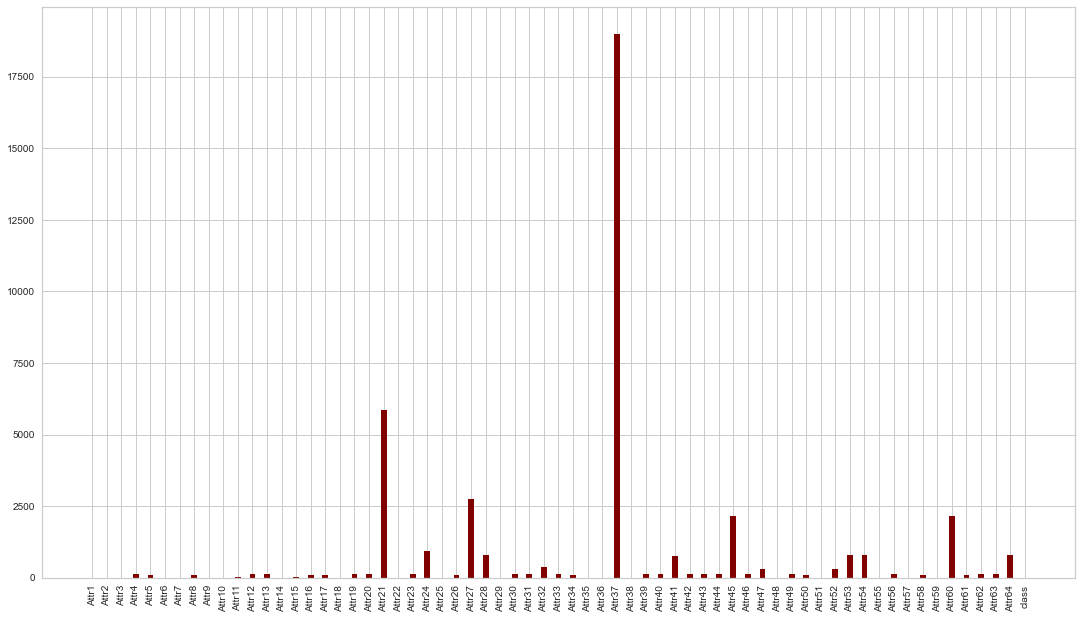

In [53]:
#Missing values plot
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(rotation=90)
plt.bar(null['index'], null[0], color ='maroon',width = 0.4)

* Several of the variable columns had some missing data, which we addressed by using a mean to impute the missing data.we see the attributes with the most missing values is Attr 37 with about 18000 and next to that is Attr 21 with 6000 missing values.

In [10]:
full_df['class'].unique()

array([b'0', b'1'], dtype=object)

In [11]:
full_df['class'].value_counts(normalize=False)

b'0'    41314
b'1'     2091
Name: class, dtype: int64

In [12]:
full_df['class'].value_counts(normalize=True)

b'0'    0.951826
b'1'    0.048174
Name: class, dtype: float64

In [6]:
classes = []

for index, row in full_df.iterrows():
    class_val = row['class']
    if class_val not in classes:
        classes.append(class_val)

In [7]:
classes

[b'0', b'1']

In [8]:
class_dict = {}

for index, i in enumerate(classes):
    class_dict.update({i:str(index)})
    
class_dict

{b'0': '0', b'1': '1'}

In [9]:
full_df['class'] = full_df['class'].map(class_dict)

* There is also a large imbalance within the "Class" column with "0" accounting for ~95% and "1" accounting for only about 5%.<br>

In [67]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.model_selection import train_test_split

X = full_df.loc[:, full_df.columns != 'class']
y = full_df['class']

#splitting data into train/test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

#### Important Features

In [22]:
clf_gb = GradientBoostingClassifier(learning_rate= 1, max_depth= 2, min_samples_split= 2, 
                                    n_estimators= 50, random_state=1234).fit(X_train, y_train)

In [23]:
a = zip((clf_gb.feature_importances_),full_df.columns)

df = pd.DataFrame(a)

dfz =[]
for i in range(1,len(df)):
    if df.iloc[i,0]==0:
        dfz.append(df.iloc[i])
df_zero = pd.DataFrame(dfz)
df_zero

,0,1
6,0.0,Attr7
7,0.0,Attr8
10,0.0,Attr11
13,0.0,Attr14
15,0.0,Attr16
17,0.0,Attr18
18,0.0,Attr19
19,0.0,Attr20
25,0.0,Attr26
27,0.0,Attr28


* Because we will be using XGBoost there is a regularization that takes place during the modelling that reduces the irrelevant coefficient weight to 0, and hence removes the variable. the variables that were removed from the our model due to low significance were: 
    * Attr7: EBIT / total assets
    * Attr8: book value of equity / total liabilities
    * Attr10: equity / total assets
    * Attr11: (gross profit + extraordinary items + financial expenses) / total assets
    * Attr18: gross profit / total assets
    * Attr19: gross profit / sales
    * Attr23: net profit / sales
    * Attr45: net profit / inventory
    * Attr54: constant capital / fixed assets
    * Attr55: working capital
    * Attr60: sales / inventory

#### Model Assumptions
* Random Forest Model
    * This model makes no assumptions other than the sample data is representative, though this is common for most models.
* XGBoost Model
    * An assumption may be made ordinal values applied to encoded integer values, however as all attributes were float values this should not cause issues for our model.

<a id="3"></a>
## Modeling Preparations

We are planning to use random forest with a number of parameteres to check the best set of paramters and compare the model to XGBoost with also a variety of parameters to see which mdel performs better. because the original data set is not balanced we will also run resample the data to make the target values balanced with the best paraameters to see if this prodicts a better model.

Some reasons this models were chosen because XGBoost automatically has regularization built into it and reduces over fitting where the ordinary gradient boost and random forest cannot, and XGBoost also has an in-built routine to handle missing values. Random forest also has the ability to predict fairly accurately with missing values<br>

<b>Models</b>
1. Random Forest with parameter tuning - grid search
2. Gradient Boost with parameter tuning - grid search
3. XGBoost 


<b>Metrics</b><br>

Our evaluation metrics would be accuaracy, precision and recall. In the case of Bankruptcy we know that if we fail to predict the False Negative correctly that means we continue to service the companies that will go bankrupt this will be the more severe outcome as the bank may loose a large financial investment, compared to predicting a false positive which would make the bank closely moniter a company that would most likely not go backrupt. 

<b>Since we are trying to limit our False Negatives the  most relevant metric would be the recall</b>.<br>

1. Accuracy
2. Precision
3. Recall (Critical Metric)


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.33, random_state=42)
sss.get_n_splits(X, y)

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

5

TRAIN: [ 5012  2054 26736 ... 12174 24684  2896] TEST: [21312 31727 24582 ... 11525 21829   815]
TRAIN: [29591  1055  4832 ... 19344 21112 30060] TEST: [37509  9566 41221 ...  7035  9105 34586]
TRAIN: [40791 10807 23767 ... 29003 11112 34789] TEST: [15165 38730  9613 ...  6174  7557 13450]
TRAIN: [26769 19277 14802 ... 33038 27501 35007] TEST: [35856  3967  2599 ... 27171 17672 30821]
TRAIN: [36670  8161 15866 ... 15019  5347 11435] TEST: [19052 12929 23872 ... 34560 35897 19421]


#### Imputation for Missing Values

In [13]:
from sklearn.impute import SimpleImputer

#imputing missing values using mean
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_train)

X_train = imp_mean.transform(X_train)
X_test = imp_mean.transform(X_test)

SimpleImputer()

In [14]:
#SMOTE balancing for minority class
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)

unique_elements, counts_elements = np.unique(y_train_os, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[['0' '1']
 [27680 27680]]


<a id="4"></a>
## Modeling Building and Evaluation

<b>Random Forest Classifier & Hyperparameters </b><br>
We used grid search to find all combinations of the following hyperparameters. 
1. n_estimators = number of trees in the foreset
2. min_samples_split = min number of data points placed in a node before the node is split
3. max_depth = max number of levels in each decision tree
4. criterion = The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

We used min_samples_split of the treesto help regularise the individual trees if needed, for max depth we understand The larger an individual tree, the more chance it has of overfitting the training data,

<b>Gradient Boost Classifier & Hyperparameters </b><br>

1. n_estimators = number of trees in the foreset
2. max_depth = The maximum depth of a tree.
3. min_samples_split = min number of data points placed in a node before the node is split
4. Learning rate = the rate at which the model is being trained or fit

Min sample split is used to control over-fitting, Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree, while Too high values can lead to under-fitting hence, it should be tuned using CV which is incoperated in our gridsearch parameter where we use 5-fold cross validation.
We implemented a learning rate because a problem with gradient boosted decision trees is that they are quick to learn and overfit training data so we decided to check different rates to see which is more beneficial.

<b>XBBoost Classifier</b><br>
1. n_estimators = number of trees in the foreset
2. max_depth = The maximum depth of a tree.
3. min_child_weight = minimum weight needed in a child for a split to occur

<b> Sampling Method </b><br>
Due to the imbalanced nature of the minority class in the data set we implemented a stratified shuffle split to create the train and test set. This should work to ensure each fold in cross validation is representative of the distribution for samples of the original data set.

#### Random Forest Classifier

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [16]:
tuned_parameters = {
    'n_estimators':[10,20,50],
    'max_depth':[5,10],
    'criterion':['gini','entropy'],
    'min_samples_split':[2,4,9]
    }
scores = ['accuracy']

In [17]:
%%time
for score in scores:
    print("Tuning hyper-parameters for %s" % score)
    print()
    
    clf = GridSearchCV(RandomForestClassifier(random_state=1234), tuned_parameters, cv=5, n_jobs=-1)
    clf.fit(X_train,y_train)
    
    print("Best parameters set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f for %r" % (mean, params))
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))

Tuning hyper-parameters for accuracy

Best parameters set:

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 50}

Grid scores on set:

0.955 for {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 10}
0.955 for {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 20}
0.954 for {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
0.955 for {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 10}
0.955 for {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 20}
0.954 for {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 50}
0.955 for {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 9, 'n_estimators': 10}
0.954 for {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 9, 'n_estimators': 20}
0.954 for {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 9, 'n_estimators': 50}
0.96

#### Gradient Boost Classifier

In [18]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

clf_gbst = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)

clf_gbst.score(X_test, y_test)

Wall time: 24.2 s


0.9587405752583077

#### XGBoost Model

In [19]:
tuned_parameters = {
    'n_estimators':[50,100],
    'max_depth':[1,2],
    'learning_rate':[0.1,1],
    'min_samples_split':[2,4]
    }
scores = ['accuracy']


In [20]:
%%time
for score in scores:
    print("Tuning hyper-parameters for %s" % score)
    print()
    
    gb_clf = GridSearchCV(GradientBoostingClassifier(learning_rate=1.0, random_state=1234), tuned_parameters, cv=5, n_jobs=-1)
    gb_clf.fit(X_train,y_train)
    
    print("Best parameters set:")
    print()
    print(xgb_clf.best_params_)
    print()
    print("Grid scores on set:")
    print()
    means = gb_clf.cv_results_['mean_test_score']
    stds = gb_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, xgb_clf.cv_results_['params']):
        print("%0.3f for %r" % (mean, params))
    print()
    y_true, y_pred = y_test, gb_clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))

Tuning hyper-parameters for accuracy

Best parameters set:

{'learning_rate': 1, 'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 100}

Grid scores on set:

0.953 for {'learning_rate': 0.1, 'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.954 for {'learning_rate': 0.1, 'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.953 for {'learning_rate': 0.1, 'max_depth': 1, 'min_samples_split': 4, 'n_estimators': 50}
0.954 for {'learning_rate': 0.1, 'max_depth': 1, 'min_samples_split': 4, 'n_estimators': 100}
0.962 for {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 50}
0.965 for {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 100}
0.962 for {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 4, 'n_estimators': 50}
0.965 for {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 4, 'n_estimators': 100}
0.958 for {'learning_rate': 1, 'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 5

In [21]:
%%time
xgbst_clf = XGBClassifier(max_depth=10, min_child_weight=1,n_estimators=100)
xgbst_clf.fit(X_train,y_train)
y_true, y_pred = y_test, xgbst_clf.predict(X_test)
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))

[19:07:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13634
           1       0.90      0.57      0.70       690

    accuracy                           0.98     14324
   macro avg       0.94      0.78      0.84     14324
weighted avg       0.97      0.98      0.97     14324

[[13591    43]
 [  298   392]]
Wall time: 21.4 s


<a id="5"></a>
## Model Intepretability & Explainability

FeatureImportances(ax=<AxesSubplot:>,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=10,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=4,
                                           num_parallel_tree=1, random_state=0,
                                           reg_alpha=0, reg_lambda=1,
                         

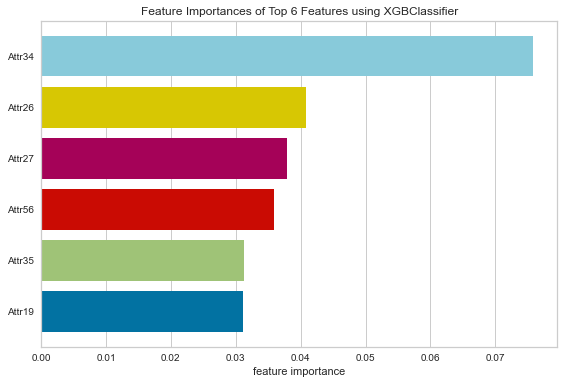

<AxesSubplot:title={'center':'Feature Importances of Top 6 Features using XGBClassifier'}, xlabel='feature importance'>

In [68]:
viz = FeatureImportances(xgbst_clf,topn=6,relative=False)
viz.fit(X_test, y_test)
viz.show()

* The top 6 important features identified for the base XGBoost model were as follows ordered by importance:
    * **Attr34: operating expenses / total liabilities**
    * Attr26: (net profit + depreciation) / total liabilities
    * Attr27: profit on operating activities / financial expenses
    * Attr56: (sales - cost of products sold) / sales
    * Attr35: profit on sales / total assets
    * Attr19: gross profit / sales
    
* Clients with larger operating expenses were at a far greater risks of bankruptcy according to features identified by the model. Profit, liabilities and assets while also important, were far outweighed by bankruptcy risks due to large operation expenses.

SimpleImputer()

<Figure size 576x396 with 0 Axes>

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

RandomForestClassifier(max_depth=10, min_samples_split=100, n_estimators=50,
                       random_state=1234)

[19:19:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, '1-Specificity (False Positive Rate)')

Text(0, 0.5, 'Sensitivity (True Positive Rate)')

Text(0.5, 1.0, 'Logistic Regression v. XGBoost ROC')

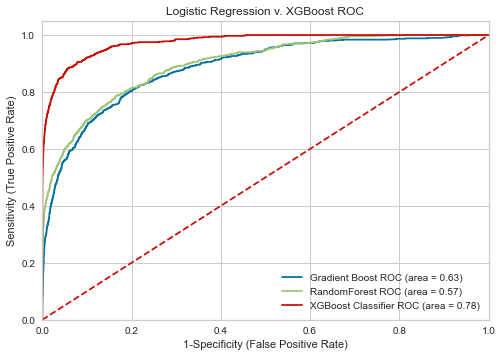

In [33]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_train)

X_train = imp_mean.transform(X_train)
X_test = imp_mean.transform(X_test)

plt.figure()
# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Gradient Boost',
    'model': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0),
},    
{
    'label': 'RandomForest',
    'model': RandomForestClassifier(n_estimators = 50, max_depth = 10, min_samples_split = 100, random_state=1234),
},
{
    'label': 'XGBoost Classifier',
    'model': XGBClassifier(max_depth=10, min_child_weight=1,n_estimators=100),
}
]
# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1],pos_label='1')
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Logistic Regression v. XGBoost ROC')
plt.legend(loc="lower right")
plt.show()


In [24]:
Model_compare = pd.DataFrame(
{'Model': ['Random Forest','Gradient Boost','XGBoost'],
'Precision[0]': ['0.96','0.97','0.98'],
'Recall[0]': ['1.00','0.99','1.00'],
'Precision[1]': ['0.99','0.76','0.90'],
'Recall[1]': ['0.25','0.39','0.57'],
'Accuracy': ['0.96','0.96','0.98'],
})
pd.set_option("max_colwidth", 3000)

Model_compare


,Model,Precision[0],Recall[0],Precision[1],Recall[1],Accuracy
0,Random Forest,0.96,1.00,0.99,0.25,0.96
1,Gradient Boost,0.97,0.99,0.76,0.39,0.96
2,XGBoost,0.98,1.00,0.90,0.57,0.98


* The XGBoost is the most efffective model with the highest scores in recall and accuracy for all targets. Precision of target 1 was at 0.90, this was only outperformed by the Random Forest model. However as our critical metric was recall, XGBoost far outperformed other models at 0.57.

<a id="6"></a>
## Conclusions

The most important factor in determining risk of bankruptcy was found to be due to large operating expenses. This should be one of the first considerations when looking at bankruptcy risks for potential or current clients/companies.

The three models all had relatively high accuracy with random forest and gradient boost giving a result of 96% accuracy while XGBoost has a better accuracy of 98%. This tells us that in general, the models are good but likely only at predicting the overwhelming majority class. Since the data is not balanced this may not be the best metric to use.

The precision in this model for our target, clients that went bankrupt (target 1), tells us out of the predicted values how many were correct. In this model it tells us the number of false positives. This represents when a company did not go backrupt but the model predicted that they had gone bankrupt. This is assumed to be less severe since the bank will most likely just pay closer attention to this company which is not a major loss in investment. The best model is Random forest with 99% precision which is just slightly better than the XGBoost that has 90% precision.

The best model is the XGBoost this is because it is the best in predicting the the critical metric of recall for the target 1. The random forest performed very poorly with 25% of the recall being correct, while the gradient boost had 39%, XGBoost was the best with 57% correct recall. While this was the best comparatively to the other models it still leaves a lot of room for improvement in prediction capabilities.

Some ideas to further improve the model would be to use an oversampled or undersampled dataset to adjust for any imbalance on the minority class and check for improvements against the models previous metrics.